In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import cv2
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.transform import resize
    


/var/folders/8f/5fx_0z8s6bv_0tb_tmhs7pk00000gn/T/ipykernel_19558/76198656.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
def process_img():

    for i,j in zip(os.listdir("sample"), os.listdir("segmentation_photos"):
        org_im = cv2.imread(i)
        seg_im = cv2.imread(j)

        im2 = org_im.copy()
        im2[seg_im== 0] = 0 #[0,0,0,0]

        plt.savefig("processed_images/i.png")
# Display 


(206, 206, 3)


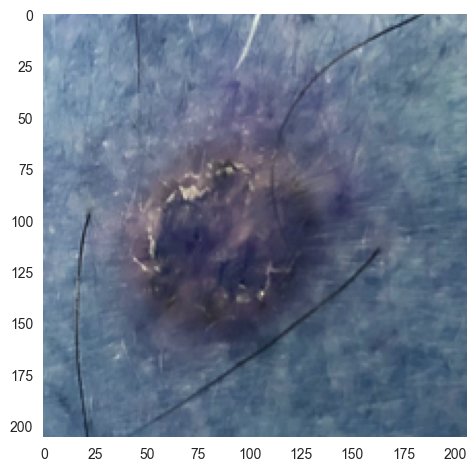

In [9]:
im = cv2.imread('segmentation_photos/test.png')
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#file_im = '/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test.png'
#im = plt.imread(file_im)
plt.imshow(im)
plt.grid(None)
print(im.shape)

uint8


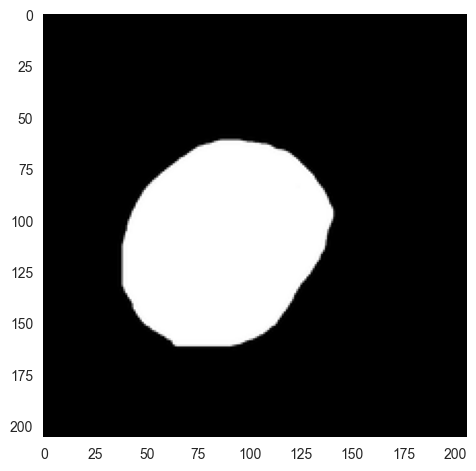

In [10]:
mask1 = cv2.imread('segmentation_photos/test-mask.png', cv2.IMREAD_UNCHANGED)
mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB) #, cv2.CV_8UC1)

#mask1= cv2.normalize(src=mask1, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

#mask1=plt.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test-mask.png')
plt.imshow(mask1, cmap="gray")
plt.grid(None)

print(np.result_type(mask1.dtype))

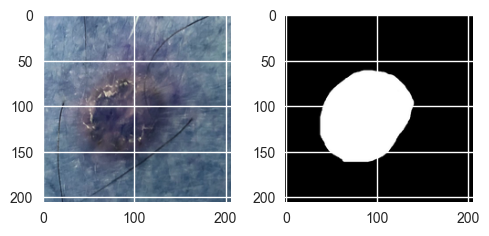

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask1, cmap='gray')
fig.tight_layout()


(206, 206, 3)


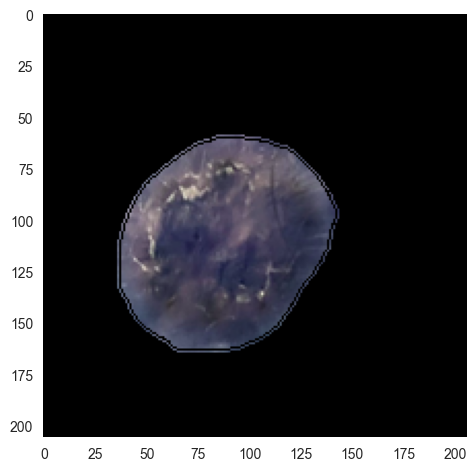

In [17]:
print(mask1.shape)
im2 = im.copy()
im2[mask1== 0] = 0 #[0,0,0,0]
# Display 
plt.imshow(im2)
plt.grid(None)

plt.savefig("processed_images/test_img.png")

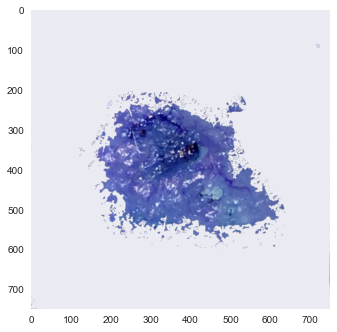

In [8]:

img3 = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_944_1795_666.png', cv2.IMREAD_UNCHANGED)
#img3= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

#image = cv2.imread('/Users/theakaroline/New.png', cv2.IMREAD_UNCHANGED)


#imga = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#alpha = src[:,:,3] # Channel 3
#image = np.dstack([imga, alpha]) # Add the alpha channel

plt.imshow(img3)
plt.grid(None)

In [13]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [14]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1],3)
    return modified_img

In [15]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    #This line creates a K-means clustering model (clf) with n_clusters = 5, 
    #which means the model will try to find 5 clusters in the input data.
    
    color_labels = clf.fit_predict(img)
    #This line applies the K-means model (clf) to the input image (img) and assigns cluster labels to each pixel.
    #The fit_predict method fits the model to the data and returns the predicted labels.
    
    center_colors = clf.cluster_centers_
    #his line retrieves the RGB values of the cluster centers from the trained K-means model (clf).
    #The cluster_centers_ attribute provides the RGB values of each cluster center.
    
    counts = Counter(color_labels) #counts pixels
    #This line creates a Counter object (counts) that counts the frequency of each cluster label 
    #(color label) in the color_labels list. The Counter class is a built-in Python class that makes
    #it easy to count occurrences of elements in a list or iterable.
    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    #This line creates a list (ordered_colors) that contains the RGB values of the cluster centers (center_colors)
    #corresponding to each unique color label in counts.keys(). It iterates over the keys (unique color labels) 
    #in counts and retrieves the corresponding RGB values from center_colors.
    
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    #This line creates a list (hex_colors) by converting the RGB values in ordered_colors to hexadecimal color
    #codes using the rgb_to_hex function. It iterates over the keys (unique color labels) in counts and 
    #converts the corresponding RGB values to hexadecimal format.
    
    plt.figure(figsize = (12, 8))
    
    if '#000000'in hex_colors:
        hex_colors.remove("#000000")
        ordered_colors.pop(0)
        del counts[0]      
        #This block of code checks if the color "#000000" (black) is present in hex_colors list.
        #If it is, it removes it from hex_colors, removes the corresponding RGB value from ordered_colors,
        #and deletes the corresponding count from counts. This is done to exclude black color from the
        #analysis if it exists.
    
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
        
    print(ordered_colors)
    print(hex_colors)
    print(counts)
    

[array([111.34533882,  46.40751378,  35.91624622]), array([229.56794041, 182.40005518, 171.87970755]), array([162.13423401,  84.05073113,  71.25153957]), array([181.11909366, 111.78253741,  96.3778796 ])]
['#e5b6ab', '#a25447', '#b56f60', '#6f2e23']
Counter({1: 47296, 4: 37070, 2: 12951, 3: 7252})


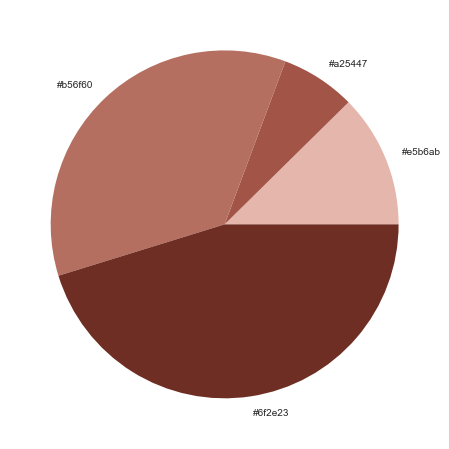

In [540]:
modified_image = prep_image(img3)
color_analysis(modified_image)


In [12]:
list_color = [[111.28561431,  46.36531882,  35.88491446], [229.40202656, 182.12693414, 171.60043818], [162.05012825,  83.94853463,  71.16143645]]

print(type(list_color))

<class 'list'>


In [13]:
image_hsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower mask (0-10)
lower_red = np.array([100,150,150])
upper_red = np.array([255,0,0])
mask0 = cv2.inRange(image, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([150,0,0])
upper_red = np.array([255,150,150])
mask1 = cv2.inRange(image, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = image.copy()
output_hsv[np.where(mask==0)] = 0

plt.imshow(output_hsv)
plt.grid(None)

NameError: name 'image' is not defined

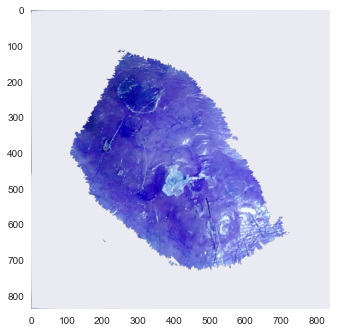

In [26]:
img = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_97_151_503.png', cv2.IMREAD_UNCHANGED)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.grid(None)
#img = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_97_151_503.png')
#plt.axis("off")
#plt.title("Original Image")
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))




[[[230 176 144]]]


(230, 176, 144)

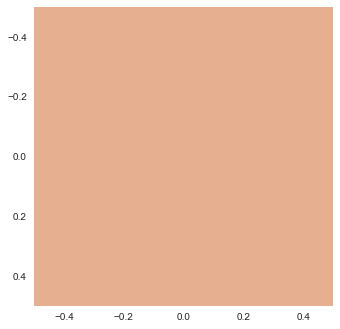

In [15]:
pixel = img[500:501,400:401,:]
print(pixel)

#Can we display this pixel? 

plt.imshow(pixel)
plt.grid(None)
230,176,144

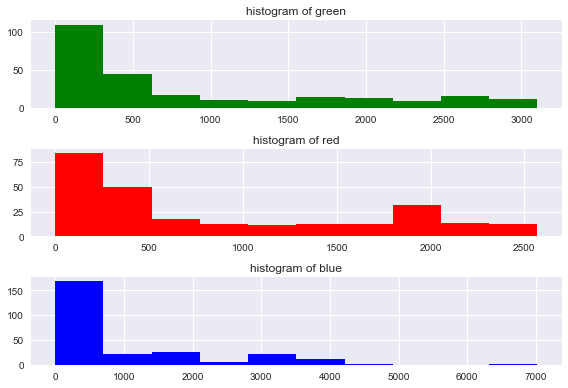

In [16]:


red_histogram = cv2.calcHist([img], [0], None, [256], [1, 256])
green_histogram = cv2.calcHist([img], [1], None, [256], [1, 256])
blue_histogram = cv2.calcHist([img], [2], None, [256], [1, 256]) 
 
plt.subplot(3,1,1)
plt.title("histogram of green")
plt.hist(blue_histogram,color="green")
 
plt.subplot(3,1,2)
plt.title("histogram of red")
plt.hist(green_histogram,color="red")
 
plt.subplot(3,1,3)
plt.title("histogram of blue")
plt.hist(red_histogram,color="blue")
 
plt.tight_layout()
plt.show()

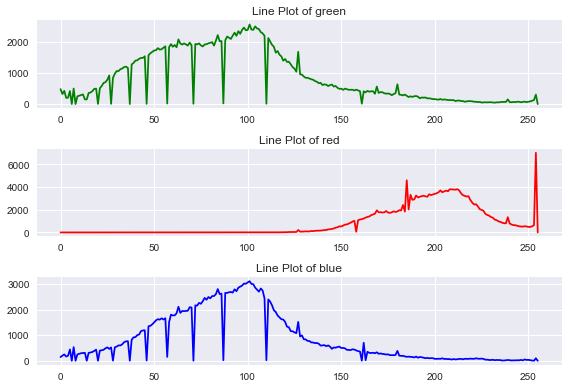

In [17]:
red_histogram = cv2.calcHist([img], [0], None, [256], [1, 256])
green_histogram = cv2.calcHist([img], [1], None, [256], [1, 256])
blue_histogram = cv2.calcHist([img], [2], None, [256], [1, 256]) 
 
plt.subplot(3,1,1)
plt.title("Line Plot of green")
plt.plot(green_histogram,color="green")
 
plt.subplot(3,1,2)
plt.title("Line Plot of red")
plt.plot(red_histogram,color="red")
 
plt.subplot(3,1,3)
plt.title("Line Plot of blue")
plt.plot(blue_histogram,color="blue")
 
plt.tight_layout()
plt.show()

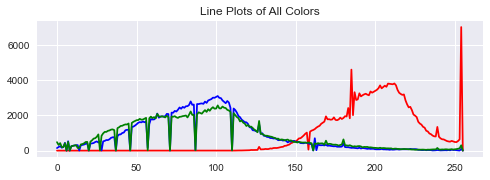

In [18]:
plt.subplot(2,1,2)
plt.title("Line Plots of All Colors")
plt.plot(red_histogram,color="red")
plt.plot(blue_histogram,color="blue")
plt.plot(green_histogram,color="green")

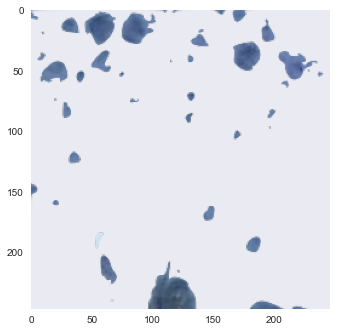

In [19]:
img2 = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_87_133_159.png', cv2.IMREAD_UNCHANGED)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.grid(None)

In [20]:
#lower_red = np.array([100,100,150])
#upper_red = np.array([0,0,255])
#mask0 = cv2.inRange(img, lower_red, upper_red)




lower_brown = np.array([40,30,0])
upper_brown = np.array([150,100,100])
mask_brown = cv2.inRange(image, lower_brown, upper_brown)


output_brown = image.copy()
output_brown[np.where(mask_brown==0)] = 0


plt.imshow(output_brown)
plt.grid(None)


NameError: name 'image' is not defined

'\nnumber between [1,0,0] and [255,80,80] should range 4 on red\n\nnumber between [1,80,80] and [255,110,110] should range 3 on red\n\nnumber between [1,110,110] and [255,130,130] should range 2 on red\n\nnumber between [1,130,130] and [255,160,160] should range 1 on red\n\n\nlower = [h-10, 100, 100]\nupper = [h+10, 255, 255]\n\nExample: For the green color, HSV color code is [60, 255, 255].\nHence, the lower and upper HSV bound of that color will be as follows.\n\nlower = [50, 100, 100]\nupper = [70, 255, 255]\n'

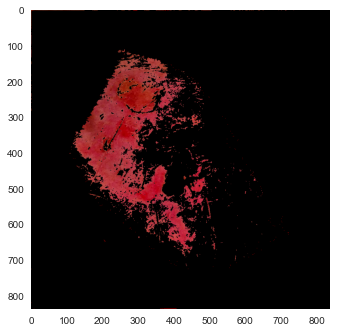

In [365]:

lower_red = np.array([1,0,0])
upper_red = np.array([255,80,80])
mask_red = cv2.inRange(img, lower_red, upper_red)

output_red = img.copy()
output_red[np.where(mask_red==0)] = 0
                         
plt.imshow(output_red)
plt.grid(None)

"""
number between [1,0,0] and [255,80,80] should range 4 on red

number between [1,80,80] and [255,110,110] should range 3 on red

number between [1,110,110] and [255,130,130] should range 2 on red

number between [1,130,130] and [255,160,160] should range 1 on red


lower = [h-10, 100, 100]
upper = [h+10, 255, 255]

Example: For the green color, HSV color code is [60, 255, 255].
Hence, the lower and upper HSV bound of that color will be as follows.

lower = [50, 100, 100]
upper = [70, 255, 255]
"""

In [21]:
import colorgram
#import colorgram: This line imports the colorgram module. This module provides a simple way to extract colors from images.
import extraction
colors = colorgram.extract('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_87_133_159.png',30)
#This line uses the extract function from the colorgram module to extract colors from the image located at the given file path.
#The 30 argument specifies that it should extract 30 colors from the image.
# print(colors)
list = []
for color in colors:
    #This line starts a loop that iterates over each color in the colors list
    # print(color)
    r = color.rgb.r
    g = color.rgb.g
    b = color.rgb.b
    #These lines extract the red, green, and blue (RGB) values of each color in the loop and assign them to the variables r, g, and b, respectively. The rgb attribute of the color object represents the RGB values.
    new_color = (r,g,b)
    # This line creates a new tuple named new_color that stores the RGB values extracted in the previous step.
    list.append(new_color)
    #This line appends the new_color tuple to the list list. It adds each extracted RGB color to the list.

print(list)

#In summary, the code uses the colorgram module to extract colors from an image file. 
#It then iterates over the extracted colors, extracts the RGB values, creates tuples for each color,
#and appends them to a list. Finally, it prints the list of RGB colors extracted from the image.

[(0, 0, 0), (169, 131, 107), (137, 102, 79), (162, 118, 97), (159, 142, 94), (245, 236, 224), (255, 255, 0), (255, 0, 0), (242, 226, 134), (255, 170, 170)]


brown pixel percentage: 0.0
166465


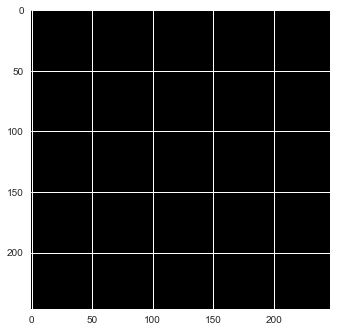

In [395]:
#img2 = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_87_133_159.png', cv2.IMREAD_UNCHANGED)


img = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_87_133_159.png')
number_of_black_pix = np.sum(img == 0) 

brown = [145, 80, 40]  # RGB
diff = 50
boundaries = [([brown[2]-diff, brown[1]-diff, brown[0]-diff],
               [brown[2]+diff, brown[1]+diff, brown[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order
for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask=mask)
    ratio_brown = cv2.countNonZero(mask)/(img.size-number_of_black_pix)
    print('brown pixel percentage:', np.round(ratio_brown*100, 2))
    plt.imshow(output)
    
    print(number_of_black_pix)

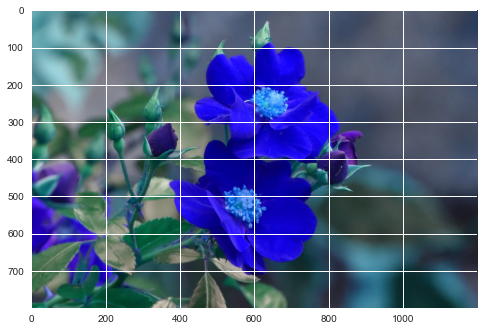

In [22]:
imag = cv2.imread("/Users/theakaroline/Documents/red-garden-rose-marondo.jpeg")
#imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
plt.imshow(imag)

219418


NameError: name 'image' is not defined

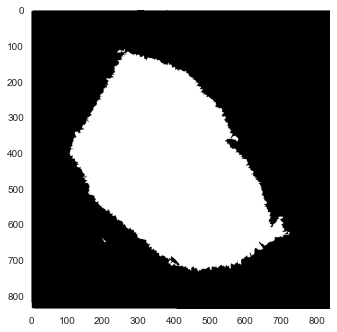

In [23]:
bw_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.inRange(bw_image, 1, 255)
normalized = cv2.normalize(bw_image, None, 0, 255, cv2.NORM_MINMAX)
output_image = np.where(mask == 0, 0, normalized)
plt.imshow(np.invert(mask))
plt.grid(None)
print(cv2.countNonZero(mask))
print((image.shape[0] * image.shape[1])-cv2.countNonZero(bw_image))

In [24]:
def extract_red_scale(image):
    # Convert image to HSV color space
    #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    red = [255, 0, 0]  # RGB
    diff = 50
    boundaries = [([red[0]-diff, red[1]-diff, red[2]-diff]),     ([red[0]+diff, red[1]+diff, red[2]+diff])]
    
    lower_red = np.array([1,0,0])
    upper_red = np.array([255,110,110])
    red_mask = cv2.inRange(rgb_image, lower_red, upper_red)

    output_red = rgb_image.copy()
    output_red[np.where(red_mask==0)] = 0
                         
    plt.imshow(output_red)
    plt.grid(None)
    
    #red_mask = cv2.inRange(image, lower_red, upper_red)
    # Compute the percentage of red pixels
    red_pixel_count = cv2.countNonZero(red_mask)
    total_pixels = cv2.countNonZero(mask)
    red_percentage = red_pixel_count / total_pixels
    print(red_pixel_count)
    # Map red percentage to the desired scale
    
    if red_percentage < 0.1:
        red_scale = 0
    elif red_percentage < 0.3:
        red_scale = 1
    elif red_percentage < 0.6:
        red_scale = 2
    else:
        red_scale = 3
    print((image.shape[0] * image.shape[1])-cv2.countNonZero(bw_image))
    print(cv2.countNonZero(bw_image))
    return red_scale


151623
482826
219418
3


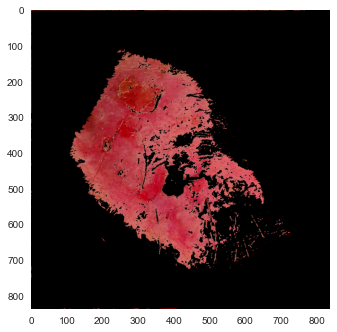

In [27]:
print(extract_red_scale(img))

In [28]:
def extract_yellow_scale(image):
    # Convert image to HSV color space
    #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    yellow = [255, 255, 0]  # RGB
    diff = 50
    boundaries = [([yellow[0]-diff, yellow[1]-diff, yellow[2]-diff]),
                  ([yellow[0]+diff, yellow[1]+diff, yellow[2]+diff])]
    
    lower_yellow = np.array([220,120,120])
    upper_yellow = np.array([255,255,255])
    yellow_mask = cv2.inRange(rgb_image, lower_yellow, upper_yellow)

    output_yellow = rgb_image.copy()
    output_yellow[np.where(yellow_mask==0)] = 0
                         
    plt.imshow(output_yellow)
    plt.grid(None)
    
    #red_mask = cv2.inRange(image, lower_red, upper_red)
    # Compute the percentage of red pixels
    yellow_pixel_count = cv2.countNonZero(yellow_mask)
    total_pixels = cv2.countNonZero(mask)
    yellow_percentage = yellow_pixel_count / total_pixels
    print(yellow_pixel_count)
    # Map red percentage to the desired scale
    
    if yellow_percentage < 0.1:
        yellow_scale = 0
    elif yellow_percentage < 0.3:
        yellow_scale = 1
    elif yellow_percentage < 0.6:
        yellow_scale = 2
    else:
        yellow_scale = 3
    print((image.shape[0] * image.shape[1])-cv2.countNonZero(bw_image))
    print(cv2.countNonZero(bw_image))
    return yellow_scale



36461
482826
219418
1


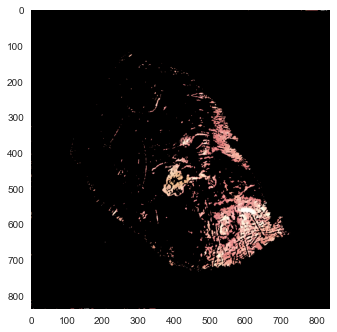

In [29]:
print(extract_yellow_scale(img))

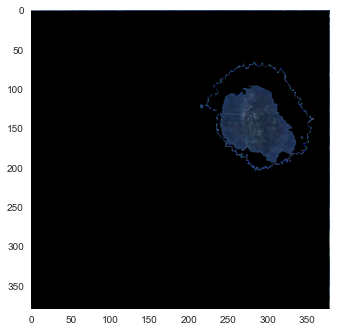

In [32]:
img4 = cv2.imread("/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_93_361_467.png")
#img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)
plt.grid(None)

In [791]:
def extract_purple_scale(image):
    # Convert image to HSV color space
    #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    purple = [255, 255, 0]  # RGB
    diff = 50
    boundaries = [([purple[0]-diff, purple[1]-diff, purple[2]-diff]),
                  ([purple[0]+diff, purple[1]+diff, purple[2]+diff])]
    
    lower_purple = np.array([50,99,0])
    upper_purple = np.array([130,100,255])
    purple_mask = cv2.inRange(rgb_image, lower_purple, upper_purple)

    output_purple = rgb_image.copy()
    output_purple[np.where(purple_mask==0)] = 0
                         
    plt.imshow(output_purple)
    plt.grid(None)
    
    #red_mask = cv2.inRange(image, lower_red, upper_red)
    # Compute the percentage of red pixels
    purple_pixel_count = cv2.countNonZero(purple_mask)
    total_pixels = cv2.countNonZero(bw_image)
    purple_percentage = purple_pixel_count / total_pixels
    print(purple_pixel_count)
    # Map red percentage to the desired scale
    
    if purple_percentage < 0.1:
        purple_scale = 0
    elif purple_percentage < 0.3:
        purple_scale = 1
    elif purple_percentage < 0.6:
        purple_scale = 2
    else:
        purple_scale = 3
    print(cv2.countNonZero(bw_image))
    print(total_pixels)
    return purple_scale




4
7613
7613
0


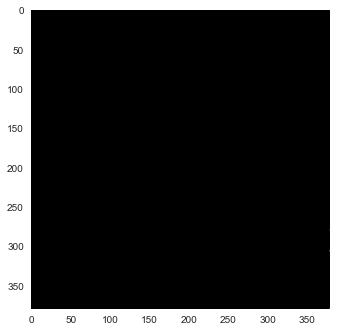

In [792]:
print(extract_purple_scale(img4))

In [30]:
def extract_brown_scale(image):
    # Convert image to HSV color space
    #hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bw_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brown = [255, 255, 0]  # RGB
    diff = 50
    boundaries = [([brown[0]-diff, brown[1]-diff, brown[2]-diff]),
                  ([brown[0]+diff, brown[1]+diff, brown[2]+diff])]
    
    lower_brown = np.array([50,0,0])
    upper_brown= np.array([150,200,100])
    brown_mask = cv2.inRange(rgb_image, lower_brown, upper_brown)

    output_brown = rgb_image.copy()
    output_brown[np.where(brown_mask==0)] = 0
                         
    plt.imshow(output_brown)
    plt.grid(None)
    
    #red_mask = cv2.inRange(image, lower_red, upper_red)
    # Compute the percentage of red pixels
    brown_pixel_count = cv2.countNonZero(brown_mask)
    total_pixels = cv2.countNonZero(bw_image)
    brown_percentage = brown_pixel_count / total_pixels
    print(brown_pixel_count)
    # Map red percentage to the desired scale
    
    if brown_percentage < 0.1:
        brown_scale = 0
    elif brown_percentage < 0.3:
        brown_scale = 1
    elif brown_percentage < 0.6:
        brown_scale = 2
    else:
        brown_scale = 3
    print(cv2.countNonZero(bw_image))
    print(total_pixels)
    return brown_scale





1896
5545
5545
2


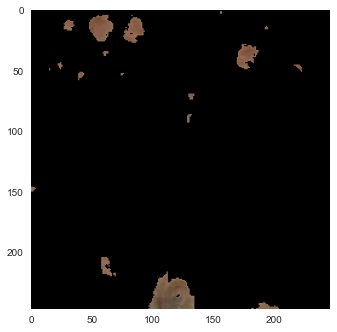

In [35]:
print(extract_brown_scale(img2))